## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from katonic.drift.adwin import ADWIN
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Creating training, testing and noisy data

In [2]:
data = load_wine(return_X_y = True,as_frame = True)

X = data[0]

y = data[1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 42)

In [3]:
#X_train.plot(kind = 'kde', subplots = True,figsize = (10,10))

### adding  noise in column ['proline','color_intensity','magesium']

In [4]:
X_noise = X_test.copy()

X_noise['proline'] = X_test['proline'] + np.random.normal(500,100,size = len(X_test['proline']))
X_noise['color_intensity'] = X_test['color_intensity'] + np.random.normal(3,5,size = len(X_test['proline']))
X_noise['magnesium'] = X_test['magnesium'] + np.random.normal(10,1,size = len(X_test['proline']))

## Distribution of proline

### compare distribution between train, test, noisy data column 'proline'

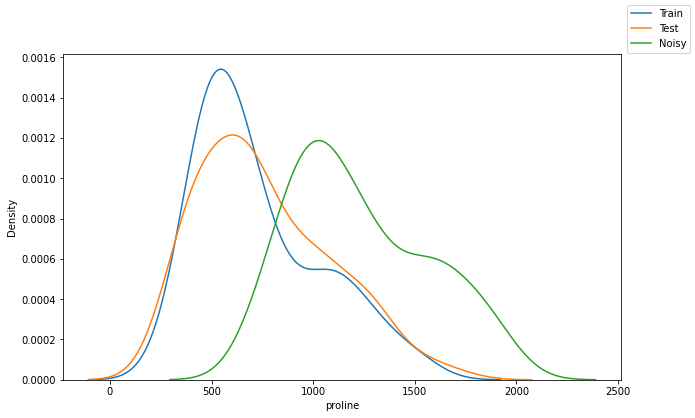

In [5]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(X_train['proline'])
sns.kdeplot(X_test['proline'])
sns.kdeplot(X_noise['proline'])
fig.legend(labels=['Train','Test','Noisy'])
plt.show()

## Distribution of magnesium

### compare distribution between train, test, noisy data column 'magnesium'

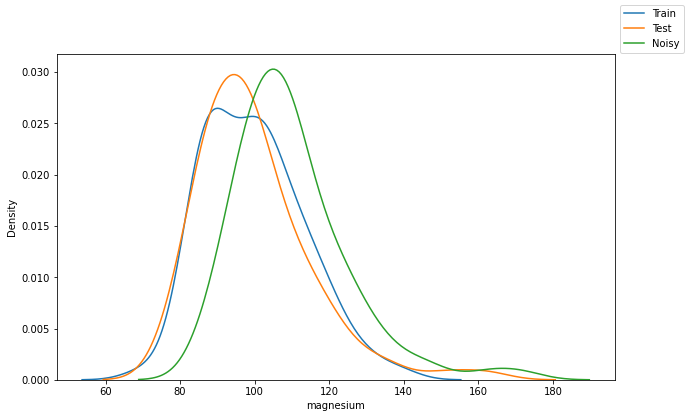

In [6]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(X_train['magnesium'])
sns.kdeplot(X_test['magnesium'])
sns.kdeplot(X_noise['magnesium'])
fig.legend(labels=['Train','Test','Noisy'])
plt.show()

## Distribution of color intensity

### compare distribution between train, test, noisy data column 'color_intensity'

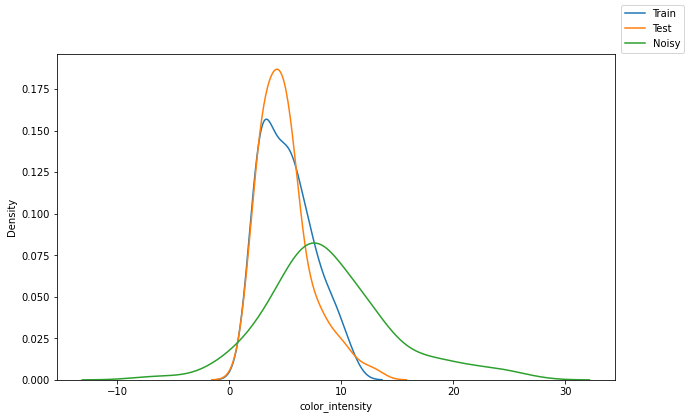

In [7]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(X_train['color_intensity'])
sns.kdeplot(X_test['color_intensity'])
sns.kdeplot(X_noise['color_intensity'])
fig.legend(labels=['Train','Test','Noisy'])
plt.show()

In [8]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
79,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0
101,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562.0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0


## Applying drift detection : ADWIN

In [9]:
ad = ADWIN()
ad.fit(X_train)

For column alcohol : 
 variance in window 0.7637786390607251 
 mean in window 12.960112359550564
For column malic_acid : 
 variance in window 1.2009395278373947 
 mean in window 2.4347191011235956
For column ash : 
 variance in window 0.06497078651685396 
 mean in window 2.3699999999999997
For column alcalinity_of_ash : 
 variance in window 13.029193283676308 
 mean in window 19.695505617977528
For column magnesium : 
 variance in window 175.8336068678197 
 mean in window 99.68539325842697
For column total_phenols : 
 variance in window 0.45686206287084946 
 mean in window 2.3039325842696625
For column flavanoids : 
 variance in window 1.080746471405126 
 mean in window 2.002022471910113
For column nonflavanoid_phenols : 
 variance in window 0.017766847620249968 
 mean in window 0.37359550561797755
For column proanthocyanins : 
 variance in window 0.3169776543365736 
 mean in window 1.5746067415730338
For column color_intensity : 
 variance in window 5.346087766696124 
 mean in window 

ADWIN()

## Test Data

In [11]:
predictions

[[{'Is drift': False,
   'Is warning': False,
   'Variance of window': 0.6184908920029739,
   'No of Detections': 0,
   'Mean of widow': 13.014119850187257,
   'Column name or number': 'alcohol'}],
 [{'Is drift': False,
   'Is warning': False,
   'Variance of window': 1.250058126779728,
   'No of Detections': 0,
   'Mean of widow': 2.3035580524344565,
   'Column name or number': 'malic_acid'}],
 [{'Is drift': False,
   'Is warning': False,
   'Variance of window': 0.07812674606180481,
   'No of Detections': 0,
   'Mean of widow': 2.365355805243446,
   'Column name or number': 'ash'}],
 [{'Is drift': False,
   'Is warning': False,
   'Variance of window': 10.425765265328447,
   'No of Detections': 0,
   'Mean of widow': 19.428089887640454,
   'Column name or number': 'alcalinity_of_ash'}],
 [{'Is drift': False,
   'Is warning': False,
   'Variance of window': 211.84516545329575,
   'No of Detections': 0,
   'Mean of widow': 99.76029962546816,
   'Column name or number': 'magnesium'}],
 

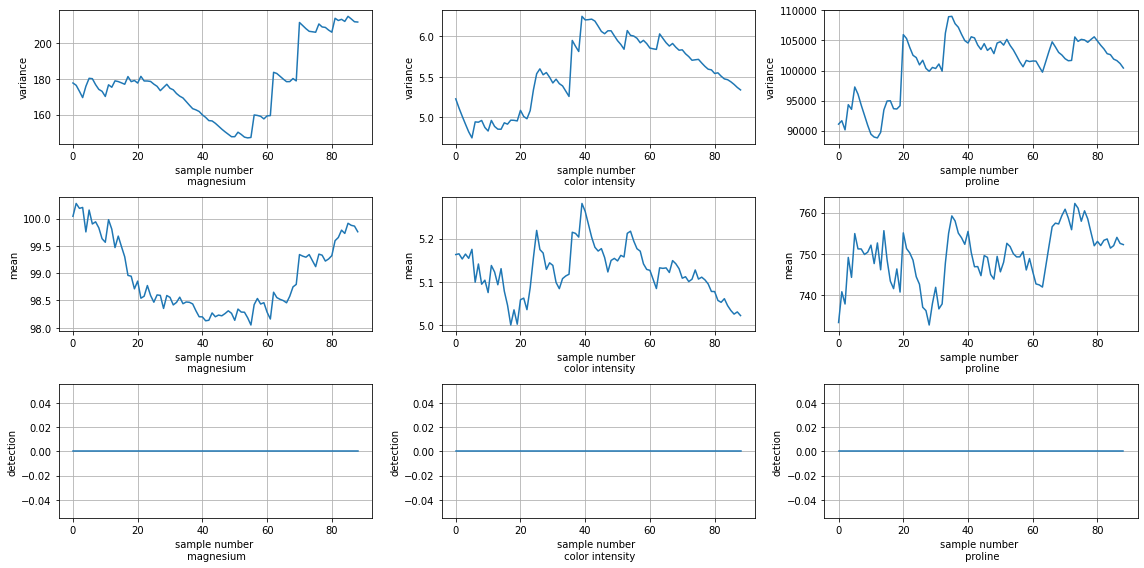

In [10]:

variance_ls_4 = []
mean_ls_4 = []
n_ls_4 = []

variance_ls_9 = []
mean_ls_9 = []
n_ls_9 = []

variance_ls_12 = []
mean_ls_12 = []
n_ls_12 = []
for i in range(len(X_test)):
    predictions = ad.predict(X_test.iloc[i:i+1])
    drift, warn, variance, n_detections, mean, col_name = predictions[4][0].values()

    variance_ls_4.append(variance)
    mean_ls_4.append(mean)
    n_ls_4.append(n_detections)
    
    drift, warn, variance, n_detections, mean, col_name = predictions[9][0].values()

    variance_ls_9.append(variance)
    mean_ls_9.append(mean)
    n_ls_9.append(n_detections)
    
    drift, warn, variance, n_detections, mean, col_name = predictions[12][0].values()

    variance_ls_12.append(variance)
    mean_ls_12.append(mean)
    n_ls_12.append(n_detections)



fig = plt.figure(tight_layout=True,figsize=(16,8))
gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot(gs[0, 0])
#fig, axs = plt.subplots(3, 3,squeeze=False)
ax.plot(variance_ls_4)
ax.set_xlabel('sample number \n magnesium')
ax.set_ylabel('variance')
ax.grid(True)
ax = fig.add_subplot(gs[1, 0])
ax.plot(mean_ls_4)
ax.set_xlabel('sample number \n magnesium')
ax.set_ylabel('mean')
ax.grid(True)
ax = fig.add_subplot(gs[2, 0])
ax.plot(n_ls_4)
ax.set_xlabel('sample number \n magnesium')
ax.set_ylabel('detection')
ax.grid(True)

ax = fig.add_subplot(gs[0, 1])
ax.plot(variance_ls_9)
ax.set_xlabel('sample number \n color intensity')
ax.set_ylabel('variance')
ax.grid(True)
ax = fig.add_subplot(gs[1, 1])
ax.plot(mean_ls_9)
ax.set_xlabel('sample number \n color intensity')
ax.set_ylabel('mean')
ax.grid(True)
ax = fig.add_subplot(gs[2, 1])
ax.plot(n_ls_9)
ax.set_xlabel('sample number \n color intensity')
ax.set_ylabel('detection')
ax.grid(True)

ax = fig.add_subplot(gs[0, 2])
ax.plot(variance_ls_12)
ax.set_xlabel('sample number \n proline')
ax.set_ylabel('variance')
ax.grid(True)
ax = fig.add_subplot(gs[1,2])
ax.plot(mean_ls_12)
ax.set_xlabel('sample number \n proline')
ax.set_ylabel('mean')
ax.grid(True)
ax = fig.add_subplot(gs[2, 2])
ax.plot(n_ls_12)
ax.set_xlabel('sample number \n proline')
ax.set_ylabel('detection')
ax.grid(True)

## Noisy Data

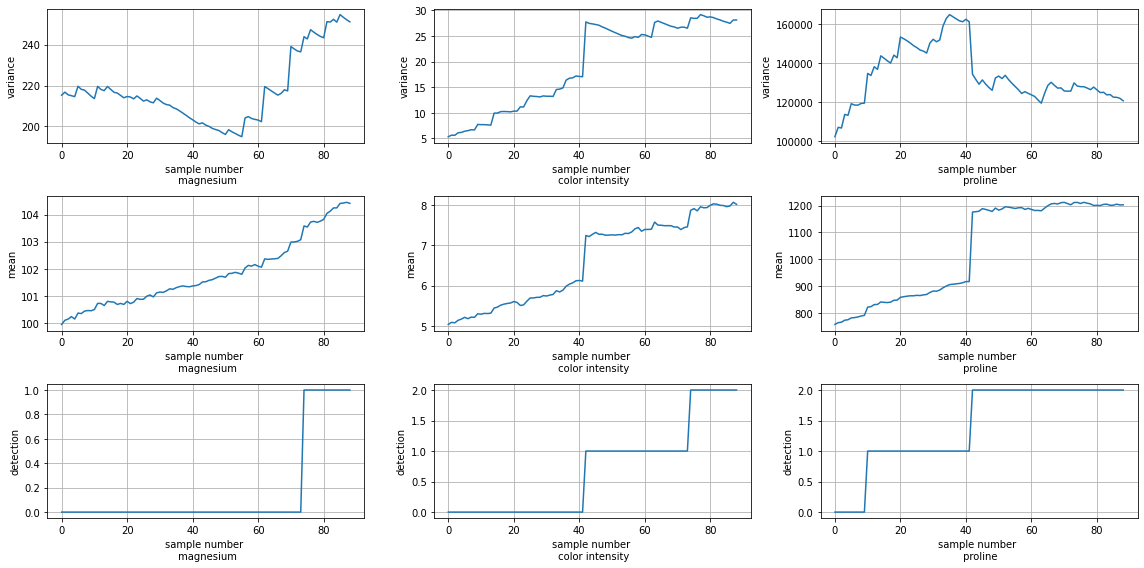

In [12]:
variance_ls_4 = []
mean_ls_4 = []
n_ls_4 = []

variance_ls_9 = []
mean_ls_9 = []
n_ls_9 = []

variance_ls_12 = []
mean_ls_12 = []
n_ls_12 = []
for i in range(len(X_noise)):
    predictions = ad.predict(X_noise.iloc[i:i+1])
    drift, warn, variance, n_detections, mean, col_name = predictions[4][0].values()

    variance_ls_4.append(variance)
    mean_ls_4.append(mean)
    n_ls_4.append(n_detections)
    
    drift, warn, variance, n_detections, mean, col_name = predictions[9][0].values()

    variance_ls_9.append(variance)
    mean_ls_9.append(mean)
    n_ls_9.append(n_detections)
    
    drift, warn, variance, n_detections, mean, col_name = predictions[12][0].values()

    variance_ls_12.append(variance)
    mean_ls_12.append(mean)
    n_ls_12.append(n_detections)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True,figsize=(16,8))
gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot(gs[0, 0])
#fig, axs = plt.subplots(3, 3,squeeze=False)
ax.plot(variance_ls_4)
ax.set_xlabel('sample number \n magnesium')
ax.set_ylabel('variance')
ax.grid(True)
ax = fig.add_subplot(gs[1, 0])
ax.plot(mean_ls_4)
ax.set_xlabel('sample number \n magnesium')
ax.set_ylabel('mean')
ax.grid(True)
ax = fig.add_subplot(gs[2, 0])
ax.plot(n_ls_4)
ax.set_xlabel('sample number \n magnesium')
ax.set_ylabel('detection')
ax.grid(True)

ax = fig.add_subplot(gs[0, 1])
ax.plot(variance_ls_9)
ax.set_xlabel('sample number \n color intensity')
ax.set_ylabel('variance')
ax.grid(True)
ax = fig.add_subplot(gs[1, 1])
ax.plot(mean_ls_9)
ax.set_xlabel('sample number \n color intensity')
ax.set_ylabel('mean')
ax.grid(True)
ax = fig.add_subplot(gs[2, 1])
ax.plot(n_ls_9)
ax.set_xlabel('sample number \n color intensity')
ax.set_ylabel('detection')
ax.grid(True)

ax = fig.add_subplot(gs[0, 2])
ax.plot(variance_ls_12)
ax.set_xlabel('sample number \n proline')
ax.set_ylabel('variance')
ax.grid(True)
ax = fig.add_subplot(gs[1,2])
ax.plot(mean_ls_12)
ax.set_xlabel('sample number \n proline')
ax.set_ylabel('mean')
ax.grid(True)
ax = fig.add_subplot(gs[2, 2])
ax.plot(n_ls_12)
ax.set_xlabel('sample number \n proline')
ax.set_ylabel('detection')
ax.grid(True)

In [14]:
ad.predict(X_noise.values)[4]

[{'Is drift': False,
  'Is warning': False,
  'Variance of window': 4679.723298417004,
  'No of Detections': 1,
  'Mean of widow': 102.8838196466066,
  'Column name or number': 'magnesium'},
 {'Is drift': False,
  'Is warning': False,
  'Variance of window': 4707.0499834017655,
  'No of Detections': 1,
  'Mean of widow': 102.38886188676909,
  'Column name or number': 'magnesium'},
 {'Is drift': False,
  'Is warning': False,
  'Variance of window': 4732.900157286601,
  'No of Detections': 1,
  'Mean of widow': 101.90232986794696,
  'Column name or number': 'magnesium'},
 {'Is drift': False,
  'Is warning': False,
  'Variance of window': 4742.577888056524,
  'No of Detections': 1,
  'Mean of widow': 101.50569213364359,
  'Column name or number': 'magnesium'},
 {'Is drift': False,
  'Is warning': False,
  'Variance of window': 4720.722793454739,
  'No of Detections': 1,
  'Mean of widow': 101.44016067079272,
  'Column name or number': 'magnesium'},
 {'Is drift': False,
  'Is warning': Fal